<h1 align="center">Mushrooms</h1>
<h5 align="center">by</h5>
<h3 align="center">Monde Anna</h3>

<br />
<br />


<h3 align="center">Edible or Not</h3>
<h5 align="center">Predicted with the Aid of Decision Trees</h5>

<br />

<p>We will train a <b><i>Decision Tree</i></b> model on 23 species of gilled mushrooms in the Agaricus and Lepiota Family and further test the accuracy of said model.</p>

<br />
<br />


In [1]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


<br />

<h3 align="center">Globals</h3>

<br />
<br />


In [2]:
SEED = 42
SERIES = pd.core.series.Series


<br />

<h3 align="center">Data Exploration</h3>

<br />
<br />


<h5 align="center">Raw Data</h5>

<br />
<br />


In [3]:
path_to_data = "../data/mushrooms.csv"
mushrooms = pd.read_csv(path_to_data)
mushrooms.head()


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


<br />

<h5 align="center">Observation</h5>

<br />

<ul>
    <li>The feature names are non-descriptive</li>
    <br />
    <li>The naming scheme is difficult to follow, examples being:</li>
    <ul>
        <li>The target, <b><i>Is Edible</i></b> is named <b><i>p</i></b> and the <b><i>Odor</i></b> feature is named <b><i>p.1</i></b>. These two are not subsets of one another, yet carry similar naming</li>
        <li><b><i>Stalk Color</i></b>, both above and below the ring are respectively named <b><i>w</i></b> and <b><i>w.1</i></b>. This is logical. Yet further on, <b><i>Veil Color</i></b> is named <b><i>w.2</i></b></li>
        <li>For clarity as to feature names, see the index of the schema below</li>
    </ul>
    <br />
    <li>Cell values are strings as opposed to being numeric</li>
</ul>

<br />
<br />


<h5 align="center">Schema</h5>

<br />
<br />


In [4]:
path_to_schema = "../data/schema.csv"
schema = pd.read_csv(path_to_schema)
schema.set_index("Feature", inplace=True)
schema.head(4)


,Cell Value A,Cell Value B,Cell Value C,Cell Value D,Cell Value E,Cell Value F,Cell Value G,Cell Value H,Cell Value I,Cell Value J,Cell Value K,Cell Value L
Feature,,,,,,,,,,,,
is_edible,p = poisonous,e = edible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap_shape,b = bell,c = conical,x = convex,f = flat,k = knobbed,s = sunken,NaN,NaN,NaN,NaN,NaN,NaN
cap_surface,f = fibrous,g = grooves,y = scaly,s = smooth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap_color,n = brown,b = buff,c = cinnamon,g = gray,r = green,p = pink,u = purple,e = red,w = white,y = yellow,NaN,NaN


<br />

<h5 align="center">Assumptions</h5>

<br />

<ul>
    <li>The features are ordered in the same manner the raw data as in the schema</li>
    <br />
    <li>Should the above be the case, then it would make sense that each feature in the raw data should have the same or lower number of unique values as compared to the schema</li>
    <br />
    <li>Recall that the schema has the <b><i>Feature</i></b> set as a feature, within which are the names of the features found in the raw data (whew!). As such:
        <ul>
            <li>The schema shall be transposed; this ensures that unique values can be calculated for what will be a feature after the transposition</li>
            <li>The initial <b><i>Feature</i></b> column, now an index, will then be dropped elsewise it will be regarded as yet another value in the new feature set</li>
        </ul>
    </li>
</ul>

<br />
<br />


<h5 align="center">Assertion of Assumption</h5>
<h5 align="center">Values in Raw Data within the Schema's Range</h5>

<br />
<br />


In [5]:
def parse_feature_values_from_schema(schema_df):
    parsed_schema = {}
    for feature in schema_transposed.columns:
        parsed_list = []
        unique_values = schema_transposed[feature].unique()
        actual_values_list = unique_values.tolist()
        if np.nan in actual_values_list:
            actual_values_list.remove(np.nan)
        for string in actual_values_list:
            parsed_list.append(string[0])
        parsed_schema[feature] = parsed_list
    return parsed_schema


<br />

<h5 align="center">Check for Range</h5>

<br />
<br />


In [6]:
mushrooms.columns = schema.index


In [7]:
schema_transposed = schema.T
schema_transposed.columns = schema.index


In [8]:
for feature in mushrooms.columns:
    observed_value_count = mushrooms[feature].nunique()
    expected_value_count = schema_transposed[feature].nunique()
    assert observed_value_count <= expected_value_count


<br />

<h5 align="center">Check for Undefined Values</h5>

<br />
<br />


In [9]:
schema_parsed = parse_feature_values_from_schema(schema_transposed)


In [10]:
for feature, schema_values in schema_parsed.items():
    for cell_value in mushrooms[feature]:
        assert cell_value in schema_values


<br />

<h5 align="center">Descriptive Statistics</h5>

<br />
<br />


In [11]:
mushrooms.describe()


Feature,is_edible,cap_shape,cap_surface,cap_color,has_bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [12]:
schema_transposed.describe()


Feature,is_edible,cap_shape,cap_surface,cap_color,has_bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,2,6,4,10,2,9,4,3,2,12,...,4,9,9,2,5,3,8,9,6,7
unique,2,6,4,10,2,9,4,3,2,12,...,4,9,9,2,5,3,8,9,6,7
top,p = poisonous,b = bell,f = fibrous,n = brown,t = bruised,a = almond,a = attached,c = close,b = broad,k = black,...,f = fibrous,n = brown,n = brown,p = partial,n = brown,n = none,c = cobwebby,k = black,a = abundant,g = grasses
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<br />

<h5 align="center">Observations</h5>

<br />

<ul>
    <li>We have shown that indeed, the values in the observed data reflect what the schema states</li>
    <br />
    <li>There are no unmentioned cell values</li>
    <br />
    <li>The raw data's unique value count is less than or equal that of the schema</li>
    <br />
    <li>All this is reflected by the descriptive statistics</li>
</ul>

<br />
<br />


<h5 align="center">Train-Test Split</h5>

<br />
<br />

In [13]:
split = train_test_split(mushrooms, test_size=0.2, random_state=SEED)
mushrooms_train, mushrooms_test = split


<br />

<h5 align="center">Duplicates and Null Values</h5>

<br />
<br />


In [14]:
invalid_data = {
"duplicates": mushrooms_train.duplicated().sum(),
"null values": mushrooms_train.isna().sum().sum(),
}

pd.DataFrame(invalid_data, index=["values"])


,duplicates,null values
values,0,0


<br />

<h5 align="center">Observation</h5>

<br />

<ul>
    <li>This is pretty much self-explanatory. The data looks to have no invalid values.</li>
</ul>

<br />
<br />


<h5 align="center">One-Hot Encoding</h5>

<br />

<p>All the features in the data are nominal. Considering this, it makes sense to <i>One-Hot Encode</i> each feature so as to better isolate the nominal values therein. Secondly, this option is relatively lateral which should hopefully limit any damage done by using shallow trees.</p>

<br />
<br />


In [15]:
def run_ordinal_encoder(data_frames):
    new_data_frames = []
    for frame in data_frames:
        encoder = OrdinalEncoder()
        encoder.fit(frame)

        encoded_array = encoder.transform(frame)

        encoded_frame = pd.DataFrame(
            data=encoded_array,
            columns=frame.columns
        )
        
        new_data_frames.append(encoded_frame)

    return new_data_frames


In [16]:
mushrooms_encoded, mushrooms_train_encoded, mushrooms_test_encoded = run_ordinal_encoder(
    [mushrooms, mushrooms_train, mushrooms_test]
)

mushrooms_train_encoded.iloc[:4, :10]


Feature,is_edible,cap_shape,cap_surface,cap_color,has_bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color
0,1.0,5.0,3.0,9.0,0.0,2.0,1.0,0.0,0.0,7.0
1,1.0,5.0,3.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0
2,1.0,2.0,3.0,2.0,0.0,8.0,1.0,0.0,1.0,0.0
3,1.0,5.0,2.0,2.0,0.0,7.0,1.0,0.0,1.0,0.0


<br />

<h3 align="center">Data Visualisation</h3>

<br />
<br />


<br />

<h5 align="center">Correlation Heatmap</h5>

<br />

<ul>
    <li>The heatmap uses <i>r<sup>2</sup></i> values between features</li>
    <br />
    <li>The effect of each pair is based on <b><i>Cohen (1988)</i></b>:
        <table>
        <tr style="heigh:200%">
            <th>Range</th>
            <th>Effect Size</th>
        </tr>
        <tr>
            <td><i>r<sup>2</sup></i> &lt; 0.10</td>
            <td>trivial</td>
        </tr>
        <tr>
            <td>0.10 &le; <i>r<sup>2</sup></i> &lt; 0.25</td>
            <td>small to medium</td>
        </tr>
        <tr>
            <td>0.25 &le; <i>r<sup>2</sup></i> &lt; 0.50</td>
            <td>medium to large</td>
        <tr>
            <td><i>r<sup>2</sup></i> &ge; 0.50</td>
            <td>trivial</td>
        </tr>
        </table>
    </li>
</ul>

<br />
<br />


In [17]:
def generate_corr_heatmap(data, vmax=1.0):
    if type(data) == SERIES:
        heatmap = generate_series_corr_heatmap(data, vmax)
    else:
        heatmap = generate_dataframe_corr_heatmap(data, vmax)

    heatmap.set_title("Feature Set Correlational Heatmap")
    heatmap.set_ylabel("$R^2$ Correlation")
    heatmap.set_xlabel("$R^2$ Correlation")

    xtick_labels = [
        word.replace("_", " ").title()
        for word in data.columns
    ]

    ytick_labels = [
        word.replace("_", " ").title()
        for word in data.index
    ]

    heatmap.set_xticklabels(xtick_labels)
    heatmap.set_yticklabels(ytick_labels)

    plt.show()


In [18]:
def generate_dataframe_corr_heatmap(data, vmax):
    mask = np.triu(data)
    np.fill_diagonal(a=mask, val=False)

    return sns.heatmap(
        data=data,
        mask=mask,
        vmax=vmax,
    )


In [19]:
def generate_series_corr_heatmap(data, vmax):
    return sns.heatmap(
        data=data,
        vmax=vmax,
        annot=True,
    )


In [20]:
corr = mushrooms_train_encoded.corr()
squared_corr = corr ** 2


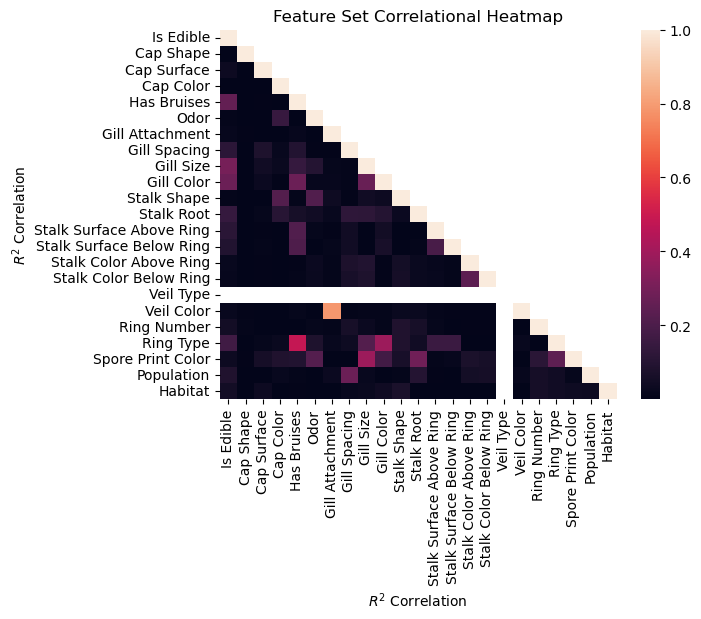

In [21]:
generate_corr_heatmap(data=squared_corr)


<br />

<h5 align="center">Initial Observations</h5>

<br />

<ul>
    <li>There looks to be minimal correlation present</li>
    <br />
    <li><b><i>Veil Color</i></b> and <b><i>Gill Attachment</i></b> look to be the only strong correlation
        <ul>
            <li>Eye-balling it, these two look to be just at <i>r<sup>2</sup></i> &gt; 0.80</li>
        </ul>
    </li>
    <br />
    <li>At just about <i>r<sup>2</sup></i> &gt; 0.50 are
        <ul>
            <li><b><i>Ring Type</i></b> and <b><i>Has Bruises</i></b>; as well as</li>
            <li><b><i>Spore Print Count</i></b> and <b><i>Stalk Root</i></b></li>
        </ul>
    </li>
    <br />
    <li>The are a few sprinklings at 0.20 &lt; <i>r<sup>2</sup></i> &lt; 0.40; but</li>
    <br />
    <li>The majority of the correlations are <i>r<sup>2</sup></i> &lt; 0.20</li>
    <br />
    <li><b><i>Veil Type</i></b> is clear through out as it only has a single unique value, thus making correlations impossible</li>
</ul>

<br />
<br />


<h5 align="center">Addressing Veil Type</h5>

<br />
<br />


In [22]:
mushrooms_train_encoded["veil_type"].unique()


array([0.])

### $$
        r = \frac
            {
                \Sigma (x_i - \hat{x}) (y_i - \hat{y})
            }
                {\sqrt {(x_i - \hat{x})^2 (y_i - \hat{y})^2}
            }
$$


<br />

<ul>
    <li>As illustrated by the <b><i>Pearson r Correlation</i></b> formula above, <i>x<sub>i</sub> == x&#770;</i> results in zero devision</li>
    <br />
    <li>Noting the above, we will run the heatmap again, this time:
        <ul>
            <li>Remove the <b><i>Veil Type</i></b> feature</li>
            <li>Reduce the maximum value of the correlationary range from 1.0 to 0.25. Though extreme, this should easily highlight which features have a medium and greater <i>r<sup>2</sup></i> value</li>
        </ul>
    </li>
</ul>

<br />
<br />


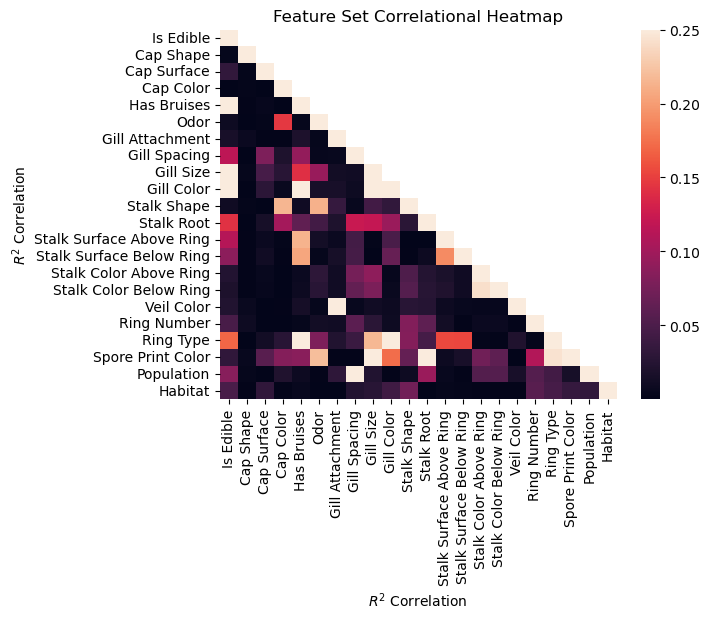

In [23]:
veil = ["veil_type"]

squared_corr_trimmed = squared_corr.drop(
    columns=veil,
    index=veil,
)

generate_corr_heatmap(
    data=squared_corr_trimmed,
    vmax=0.25
)


<br />

<h5 align="center">Secondary Observations</h5>

<br />

<ul>
    <li>Minimal patterns can be drawn from the data as is</li>
    <br />
    <li>Most correlations are below 0.10, biased below 0.05</li>
    <br />
    <li>These three features stand out as having a moderate to high correlation to <b><i>Is Edible</i></b>
        <ul>
            <li><b><i>Has Bruises</i></b></li>
            <li><b><i>Gill Color</i></b></li>
            <li><b><i>Gill Size</i></b></li>
        </ul>
    </li>
    <br />
    <li>Sadly, <b><i>Has Bruises</i></b> and <b><i>Gill Color</i></b> are covariate as they too show a medium to strong correlation</li>
    <br />
</ul>

<br />
<br />
